In [12]:
# Importing required libraries

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Using GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Defining parameters

num_epochs =20
input_size = 784
hidden1_size=128
hidden2_size=64
num_classes = 10
batch_size=100

In [ ]:
# Loading train and test datasets 

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [ ]:
print(train_dataset)
print("\n")
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


## Neural Network

In [ ]:
class MLP(nn.Module):
    # Initializing layers which will be used in forward propogation
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, num_classes)
    
    # Implementing forward propogation
    def forward(self, x):
        x = x.view(-1, input_size)

        out1=self.fc1(x)
        act1=torch.relu(out1)

        out2=self.fc2(act1)
        act2=torch.relu(out2)

        out3=self.fc3(act2)
        act3=torch.log_softmax(out3, dim=1)

        return act3



In [ ]:
# Determining loss function
criterion = nn.CrossEntropyLoss()

### Tuning batch size, learning rate and epoch number

In [ ]:
for batch_size in [10,64,100]:
  print(f"\n\n   Batch size: {batch_size}")

  # Defining train and test dataloaders for different batch sizes

  train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)

  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=False)


  for learning_rate in [0.01,0.005,0.001,0.0005]:
    print(f"\n>>Learning rate: {learning_rate}")
    

    # Defining model and optimizer for different batch sizes and learning rates
    model=MLP().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


    # Training 
    for epoch in range(num_epochs):

      for i,(images,labels) in enumerate(train_loader):
        images = images.to(device) 
        labels=labels.to(device)

        #forward pass
        train_output=model(images)
        optimizer.zero_grad()

        #loss
        loss=criterion(train_output,labels)

        #backward pass
        loss.backward()

        #update
        optimizer.step()

      
      # Prediction and evaluation
      with torch.no_grad(): 
        score=0
        n_samples=0
        for images,labels in test_loader:
          images = images.to(device) 
          labels=labels.to(device) 

          test_output=model(images)
          value, index = torch.max(test_output.data, 1)
          predicted_labels=index

          n_samples+=labels.size(0)
          correct_pred=(predicted_labels == labels)
          score+=correct_pred.sum()

        accuracy= score/n_samples*100
        print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: % {accuracy:.2f}")





   Batch size: 10

>>Learning rate: 0.01
Epoch [1/20], Accuracy: % 93.39
Epoch [2/20], Accuracy: % 93.81
Epoch [3/20], Accuracy: % 94.31
Epoch [4/20], Accuracy: % 94.85
Epoch [5/20], Accuracy: % 95.36
Epoch [6/20], Accuracy: % 94.77
Epoch [7/20], Accuracy: % 95.59
Epoch [8/20], Accuracy: % 95.24
Epoch [9/20], Accuracy: % 94.55
Epoch [10/20], Accuracy: % 94.81
Epoch [11/20], Accuracy: % 91.89
Epoch [12/20], Accuracy: % 95.44
Epoch [13/20], Accuracy: % 93.12
Epoch [14/20], Accuracy: % 95.00
Epoch [15/20], Accuracy: % 94.77
Epoch [16/20], Accuracy: % 93.70
Epoch [17/20], Accuracy: % 94.18
Epoch [18/20], Accuracy: % 93.67
Epoch [19/20], Accuracy: % 93.45
Epoch [20/20], Accuracy: % 91.68

>>Learning rate: 0.005
Epoch [1/20], Accuracy: % 94.50
Epoch [2/20], Accuracy: % 95.34
Epoch [3/20], Accuracy: % 95.65
Epoch [4/20], Accuracy: % 96.55
Epoch [5/20], Accuracy: % 95.72
Epoch [6/20], Accuracy: % 96.63
Epoch [7/20], Accuracy: % 96.89
Epoch [8/20], Accuracy: % 96.61
Epoch [9/20], Accuracy: % 

### Implementing model with chosen parameters

In [16]:
# Defining optimized parameters

batch_size=100
learning_rate=0.001
num_epochs=12

# Defining dataloaders, model and optimizer for chosen batch size, learning rate, and epoch number

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=False)

model=MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


n_iterations= len(train_loader)

# TRAINING

train_loss_list=[]
test_loss_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
  loss_total_train=0
  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device) 
    labels=labels.to(device)

    #forward pass
    train_output=model(images)
    optimizer.zero_grad()

    #train loss
    train_loss=criterion(train_output,labels)
    loss_total_train+=train_loss

    #backward pass
    train_loss.backward()

    #update
    optimizer.step()


  # Prediction and evaluation
  with torch.no_grad(): 
        score=0
        n_samples=0
        loss_total_test=0
        label_list=[]
        output_list=[]
        for images,labels in test_loader:
          images = images.to(device) 
          labels=labels.to(device) 
          label_list.extend(labels.numpy()) 

          test_output=model(images)
          value, index = torch.max(test_output.data, 1)
          predicted_labels=index
          output_list.extend(predicted_labels.numpy())

          n_samples+=labels.size(0)
          correct_pred=(predicted_labels == labels)
          score+=correct_pred.sum()

          #test loss
          test_loss=criterion(test_output,labels)
          loss_total_test+=test_loss
        
        accuracy= score/n_samples*100

        avg_train_loss=loss_total_train/n_iterations
        avg_test_loss=loss_total_test/n_iterations

        accuracy_list.append(accuracy.numpy())
        train_loss_list.append(avg_train_loss.numpy())
        test_loss_list.append(avg_test_loss.numpy())
       

  print (f"Epoch [{epoch+1}/{num_epochs}]: \n train loss= {avg_train_loss:.5f}\n test loss= {avg_test_loss:.5f}\n\n")
print(f"Accuracy:% {accuracy:.2f}")

Epoch [1/12]: 
 train loss= 0.38584
 test loss= 0.03084


Epoch [2/12]: 
 train loss= 0.16331
 test loss= 0.02242


Epoch [3/12]: 
 train loss= 0.11938
 test loss= 0.01901


Epoch [4/12]: 
 train loss= 0.09131
 test loss= 0.01660


Epoch [5/12]: 
 train loss= 0.07211
 test loss= 0.01772


Epoch [6/12]: 
 train loss= 0.05875
 test loss= 0.01424


Epoch [7/12]: 
 train loss= 0.04723
 test loss= 0.01430


Epoch [8/12]: 
 train loss= 0.03822
 test loss= 0.01433


Epoch [9/12]: 
 train loss= 0.03355
 test loss= 0.01465


Epoch [10/12]: 
 train loss= 0.02548
 test loss= 0.01419


Epoch [11/12]: 
 train loss= 0.02304
 test loss= 0.01397


Epoch [12/12]: 
 train loss= 0.01943
 test loss= 0.01424


Accuracy:% 97.70


### Model Evaluation

#### Train loss, test loss, accuracy graphs

Text(0.5, 0, 'Epoch number')

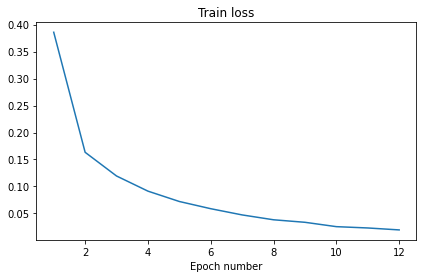

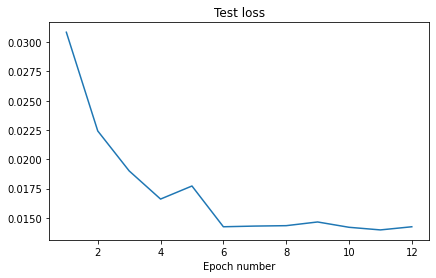

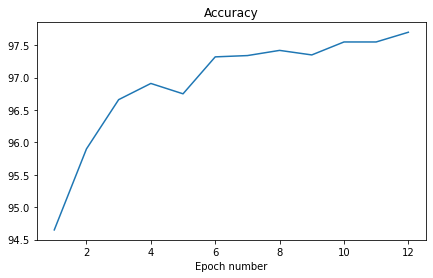

In [17]:
plt.figure(1, figsize=(6.81, 4))
plt.plot(np.arange(1,13,1),train_loss_list)
plt.title('Train loss')
plt.xlabel('Epoch number')

plt.figure(2,figsize=(6.81, 4))
plt.plot(np.arange(1,13,1),test_loss_list)
plt.title('Test loss')
plt.xlabel('Epoch number')

plt.figure(3,figsize=(6.98, 4))
plt.plot(np.arange(1,13,1),accuracy_list)
plt.title('Accuracy')
plt.xlabel('Epoch number')


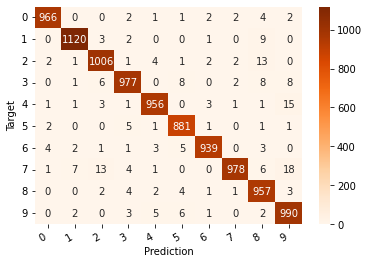

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Oranges")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Target')
  plt.xlabel('Prediction');

class_names = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(label_list, output_list)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [19]:
print(classification_report(label_list, output_list))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.95      0.98      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

